In [4]:
import pandas as pd
import dask.dataframe as dk
import numpy as np

mainData = dk.read_csv("~/Downloads/eth.usd.2020", header=None ,names=['exchange', 'unitprice', 'quantity', 'timestamp'], dtype={'timestamp': np.float64})
mainData = mainData.drop_duplicates(subset='timestamp')
mainData = mainData.dropna()
mainData = mainData.drop(labels='quantity', axis=1)

In [2]:
#ixbx
#ixbx data manipulation
krkn_data = mainData.loc[mainData['exchange'] == "krkn-eth-usd"].compute()

In [3]:
#bfnx
#bfnx data aggregation
bfnx_data = mainData.loc[mainData['exchange'] == 'bfnx-eth-usd'].compute()

In [4]:
base_data = mainData.loc[mainData['exchange'] == "base-eth-usd"].compute()

In [6]:
ixbx_data['timestamp'] = dk.to_datetime(ixbx_data['timestamp'], unit='s')
bfnx_data['timestamp'] = dk.to_datetime(bfnx_data['timestamp'], unit='s')
base_data['timestamp'] = dk.to_datetime(base_data['timestamp'], unit='s')

In [8]:
bfnx_hourly = bfnx_data.set_index('timestamp')
bfnx_hourly = bfnx_hourly.resample('60min').mean()
bfnx_hourly_computed = bfnx_hourly.dropna()
bfnx_hourly_computed

,unitprice
timestamp,
2018-01-01 00:00:00,14766.435156
2018-01-01 01:00:00,13256.782609
2018-01-01 03:00:00,7483.000000
2018-01-01 05:00:00,8845.000000
2018-01-01 07:00:00,10150.000000
...,...
2018-12-31 19:00:00,8077.326812
2018-12-31 20:00:00,8842.139474
2018-12-31 21:00:00,9160.818838


In [9]:
ixbx_hourly = ixbx_data.set_index('timestamp')
ixbx_hourly = ixbx_hourly.resample('60min').mean()
ixbx_hourly_computed = ixbx_hourly.dropna()
ixbx_hourly_computed

,unitprice
timestamp,
2018-01-01 00:00:00,9808.397484
2018-01-01 03:00:00,9031.461305
2018-01-01 06:00:00,8124.910000
2018-01-01 08:00:00,9889.525283
2018-01-01 13:00:00,6441.473434
...,...
2018-12-31 19:00:00,6385.410775
2018-12-31 20:00:00,6124.299187
2018-12-31 21:00:00,6456.822742


In [10]:
base_hourly = base_data.set_index('timestamp')
base_hourly = base_hourly.resample('60min').mean()
base_hourly_computed = base_hourly.dropna()
base_hourly_computed

,unitprice
timestamp,
2018-01-01 00:00:00,14815.560961
2018-01-01 01:00:00,15146.633933
2018-01-01 02:00:00,12675.508918
2018-01-01 03:00:00,11321.799821
2018-01-01 04:00:00,8071.794736
...,...
2018-12-11 22:00:00,14877.790000
2018-12-17 21:00:00,12080.010000
2018-12-18 19:00:00,7415.370000


In [11]:
ixbx_hourly_computed.to_csv("ixbx_hourly_computed.csv")

In [12]:
base_hourly_computed.to_csv("base_hourly_computed.csv")

In [13]:
bfnx_hourly_computed.to_csv("bfnx_hourly_computed.csv")

In [14]:
mainETH = dk.read_csv("~/Downloads/eth.usd.2020", header=None ,names=['exchange', 'unitprice', 'quantity', 'timestamp'], dtype={'timestamp': np.float64})

In [16]:
mainETH = mainETH.drop_duplicates(subset='timestamp')
mainETH = mainETH.dropna()
mainETH = mainETH.drop(labels='quantity', axis=1)

In [25]:
mainETH.groupby('exchange')['unitprice'].mean().compute()

exchange
base-eth-usd    276.254145
bfnx-eth-usd    371.984571
bnus-eth-usd    374.471071
btmx-eth-usd    312.432593
btrx-eth-usd    508.526391
eris-eth-usd    456.366399
hitb-eth-usd    188.576457
iehx-eth-usd    306.204095
itbt-eth-usd    516.122666
krkn-eth-usd    341.006118
lmax-eth-usd    353.113693
okcn-eth-usd    423.032411
prme-eth-usd    364.846830
stmp-eth-usd    365.666351
Name: unitprice, dtype: float64

In [5]:
xy = pd.read_csv("bfnx_hourly_computed.csv", parse_dates=["timestamp"])

In [10]:
g = xy.set_index('timestamp')

<AxesSubplot:xlabel='timestamp'>

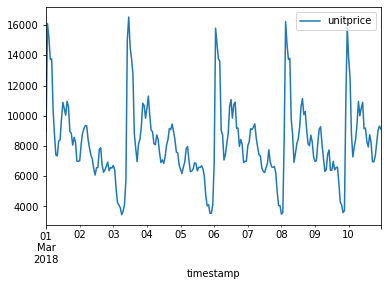

In [21]:
g["2018-03-01":"2018-03-10"].plot()

In [32]:
h = g.resample('12h').mean()

<AxesSubplot:xlabel='timestamp'>

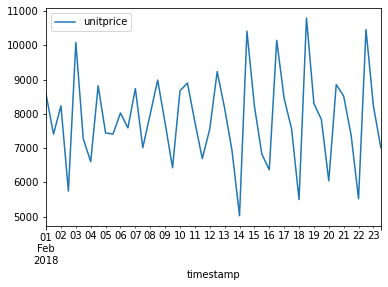

In [35]:
h["2018-02-01":"2018-02-23"].plot()